In [13]:
from plotting import visualize_demographics, demographics_pre_post, histoplot
import pandas as pd 
import numpy as np
import matplotlib as plt
import os


In [14]:
### Specify which questionnaire we are analysing
identifier = "MoCA"
tss_threshold = 10
decay_rate = 1

### Create all the different Cohorts
#### Cohorts:
    - MoCA merged with MMSE 
    - MoCA merged with MMSE but detrended with a decay rate of 1 point per year
    - MoCA without MMSE 
    - MoCA without MMSE but detrended with a decay rate of 1 point per year

In [15]:
#root_dir = "/home/georg/Documents/Neuromodulation/PD-MultiModal-Prediction"
root_dir = "/Users/georgtirpitz/Library/CloudStorage/OneDrive-Persönlich/Neuromodulation/PD-MultiModal-Prediction/"
#/home/georg/Documents/Neuromodulation/PD-MultiModal-Prediction/results/level2/level2/NGBoost/BDI_ablation_history.csv
#visualize_demographics("BDI", root_dir)
# Load the MoCA data
moca_data_path = root_dir + "/data/MoCA/level2/moca_df.csv"
moca_data_wommse = root_dir + "/data/MoCA/level2/moca_wo_mmse_df.csv" 
data_df = pd.read_csv(moca_data_path)
data_wommse_df = pd.read_csv(moca_data_wommse)

# Filter out entries with TimeSinceSurgery less than the threshold
data_df = data_df[data_df["TimeSinceSurgery"] <= tss_threshold]
data_wommse_df = data_wommse_df[data_wommse_df["TimeSinceSurgery"] <= tss_threshold]

#Calculate the detrending
trend = data_df["TimeSinceSurgery"] * decay_rate
data_detrend = data_df.copy()
data_detrend[identifier + "_diff"] = data_detrend[identifier + "_diff"] + trend
data_detrend[identifier +"_ratio"] = data_detrend[identifier + "_diff"] \
    / (data_detrend[identifier +"_sum_pre"]* 2 + data_detrend[identifier +"_diff"])

moca_data_wommse_detrend = data_wommse_df.copy()
moca_data_wommse_detrend[identifier + "_diff"] = moca_data_wommse_detrend[identifier + "_diff"] + trend
moca_data_wommse_detrend[identifier +"_ratio"] = moca_data_wommse_detrend[identifier + "_diff"] \
    / (moca_data_wommse_detrend[identifier +"_sum_pre"]* 2 + moca_data_wommse_detrend[identifier + "_diff"])

# Save the dataframes to CSV files
memory_path = root_dir + "/figures/plotting_memory/"
data_df.to_csv(memory_path + "moca.csv", index=False)
data_wommse_df.to_csv(memory_path + "moca_wo_mmse.csv", index=False)
data_detrend.to_csv(memory_path + "moca_detrend.csv", index=False)
moca_data_wommse_detrend.to_csv(memory_path + "moca_wo_mmse_detrend.csv", index=False)



### Demographics of Full data (with MMSE) and without detrending

/Users/georgtirpitz/Library/CloudStorage/OneDrive-Persönlich/Neuromodulation/PD-MultiModal-Prediction/figures/plotting.py:204: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(tick)}' for tick in ax.get_yticks()], fontsize=10)


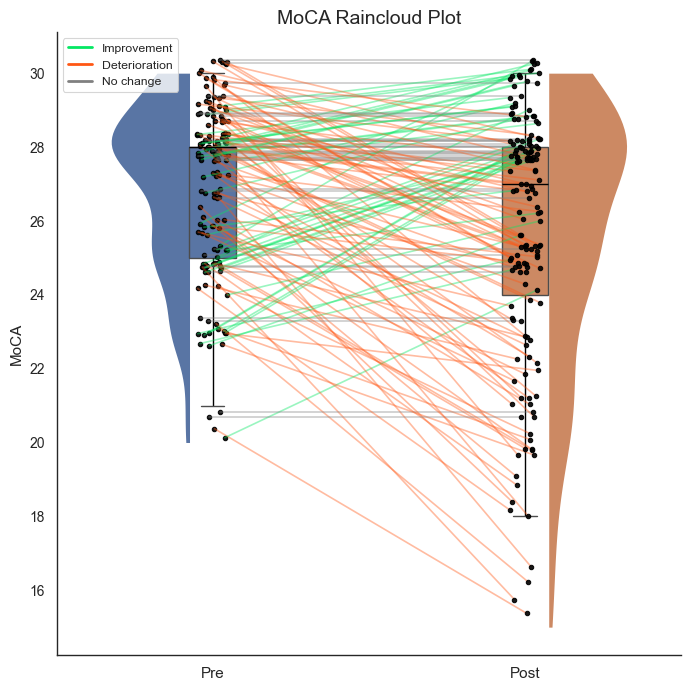

1.8429314687316862
0.8833941281629553


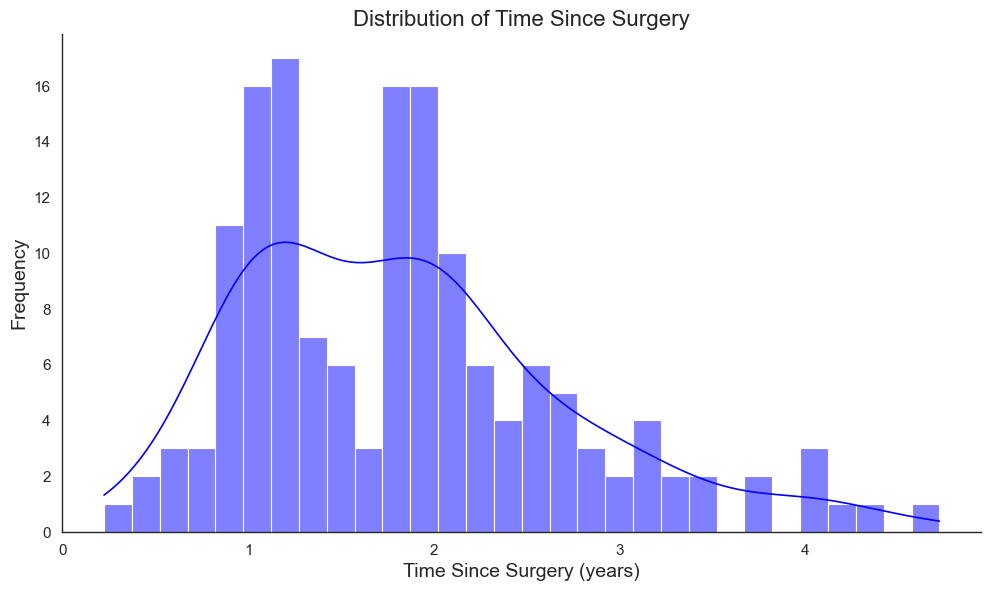

11.106619604264246
4.942703670320761


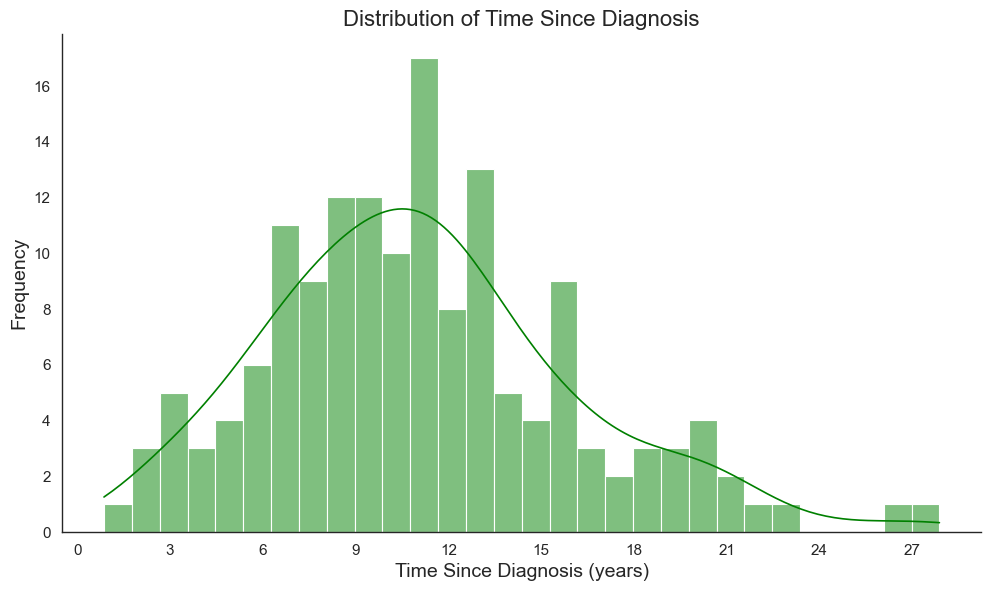

In [16]:

quest = root_dir + "/figures/plotting_memory/moca.csv"
save_path = root_dir + "/figures/MoCA_orig/"
os.makedirs(save_path, exist_ok=True)
demographics_pre_post(quest, model_data_path=None, modality_name=identifier, save_path=save_path, show=True)
histoplot(quest, "TimeSinceSurgery", save_path, show=True)
histoplot(quest, "TimeSinceDiag", save_path, show=True)

### Demographics of Full data (with MMSE) and with detrending

/Users/georgtirpitz/Library/CloudStorage/OneDrive-Persönlich/Neuromodulation/PD-MultiModal-Prediction/figures/plotting.py:204: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(tick)}' for tick in ax.get_yticks()], fontsize=10)


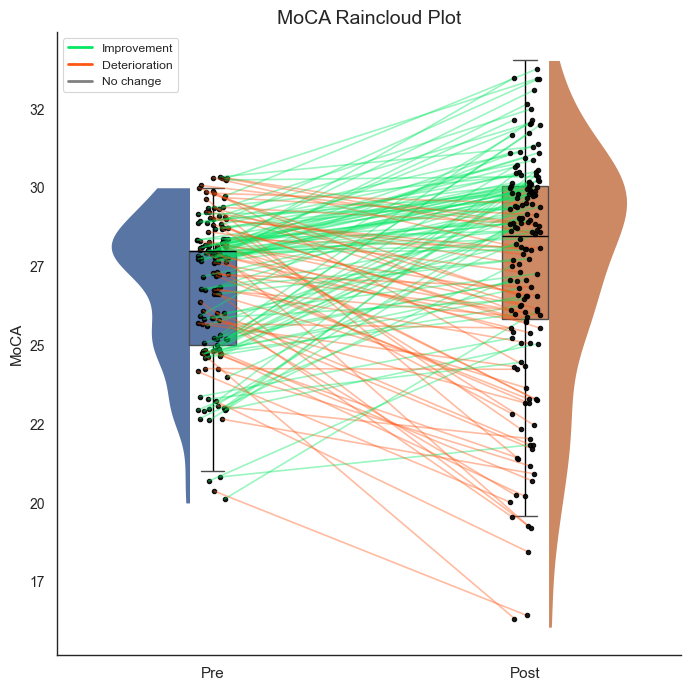

1.8429314687316862
0.8833941281629553


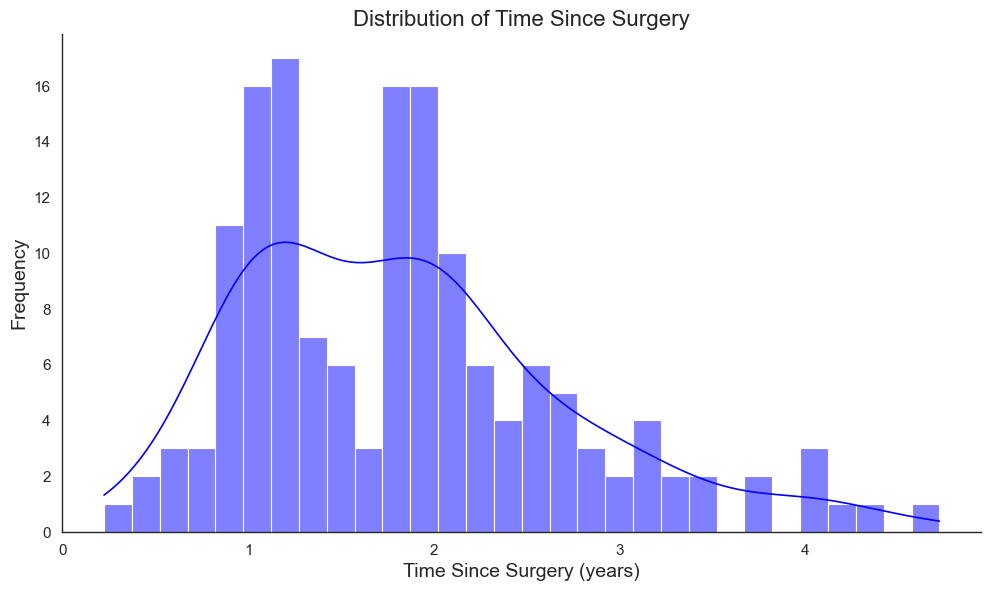

11.106619604264246
4.942703670320761


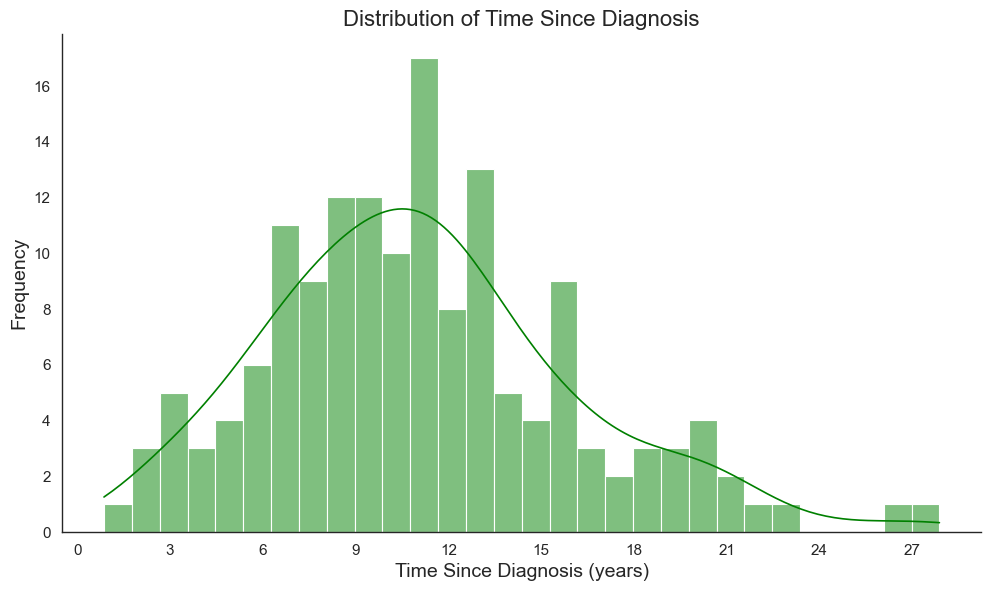

In [17]:
quest = root_dir + "/figures/plotting_memory/moca_detrend.csv"
save_path = root_dir + "/figures/MoCA_orig/"
os.makedirs(save_path, exist_ok=True)
demographics_pre_post(quest, model_data_path=None, modality_name=identifier, save_path=save_path, show=True)
histoplot(quest, "TimeSinceSurgery", save_path, show=True)
histoplot(quest, "TimeSinceDiag", save_path, show=True )

### Demographics of data without MMSE and without detrending

/Users/georgtirpitz/Library/CloudStorage/OneDrive-Persönlich/Neuromodulation/PD-MultiModal-Prediction/figures/plotting.py:204: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(tick)}' for tick in ax.get_yticks()], fontsize=10)


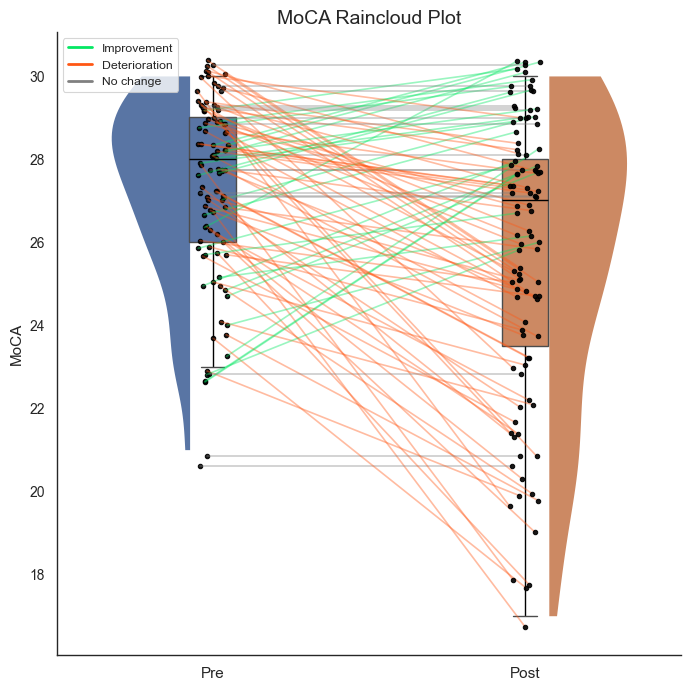

1.8772806781020333
0.9271441734100049


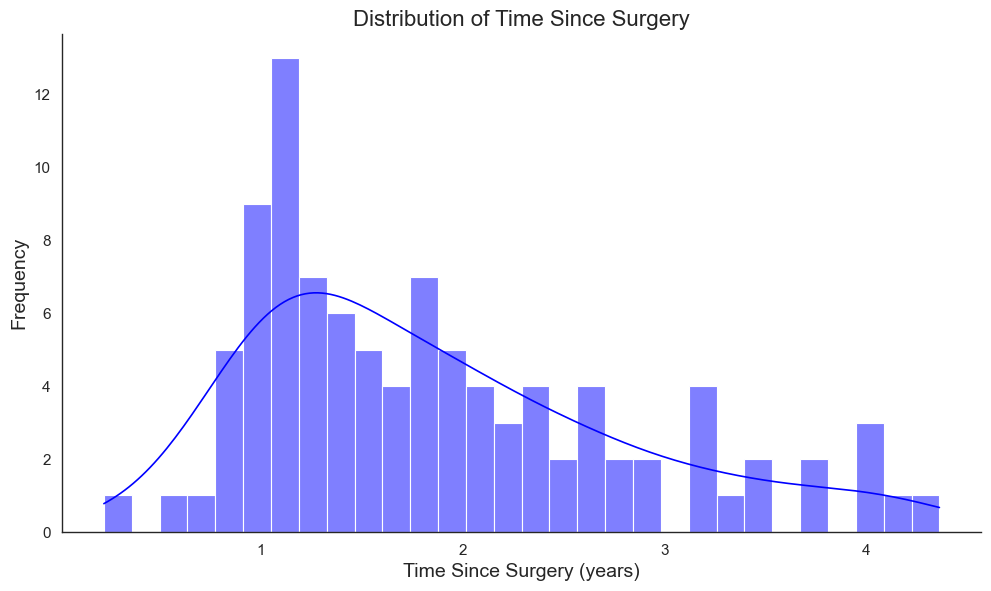

10.83765789309937
4.715716789700349


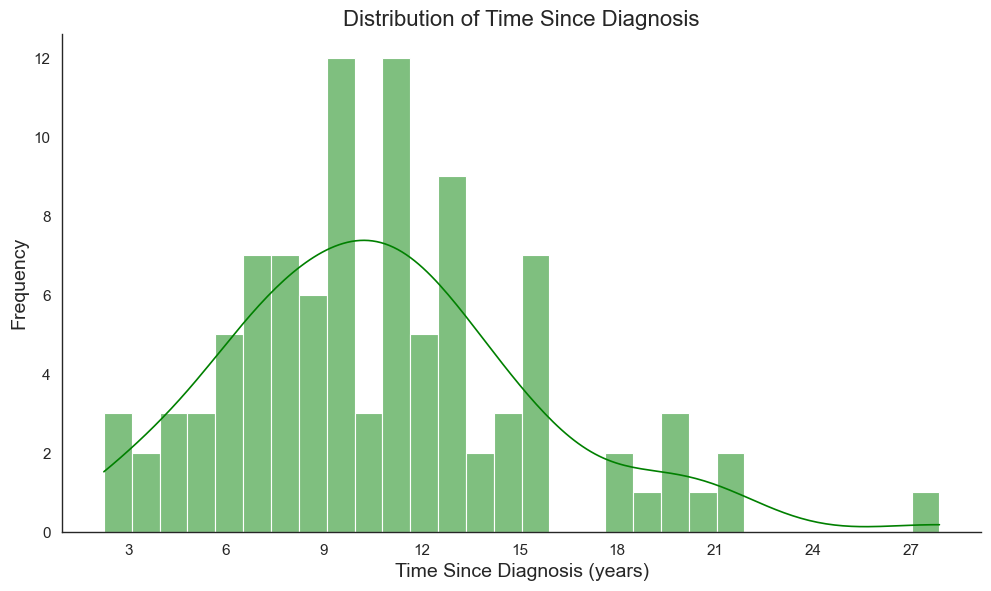

In [18]:
quest = root_dir + "/figures/plotting_memory/moca_wo_mmse.csv"
save_path = root_dir + "/figures/MoCA_orig/"
os.makedirs(save_path, exist_ok=True)
demographics_pre_post(quest, model_data_path=None, modality_name=identifier, save_path=save_path, show=True)
histoplot(quest, "TimeSinceSurgery", save_path, show=True)
histoplot(quest, "TimeSinceDiag", save_path, show=True)

### Demographics of data without MMSE and with detrending


/Users/georgtirpitz/Library/CloudStorage/OneDrive-Persönlich/Neuromodulation/PD-MultiModal-Prediction/figures/plotting.py:204: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(tick)}' for tick in ax.get_yticks()], fontsize=10)


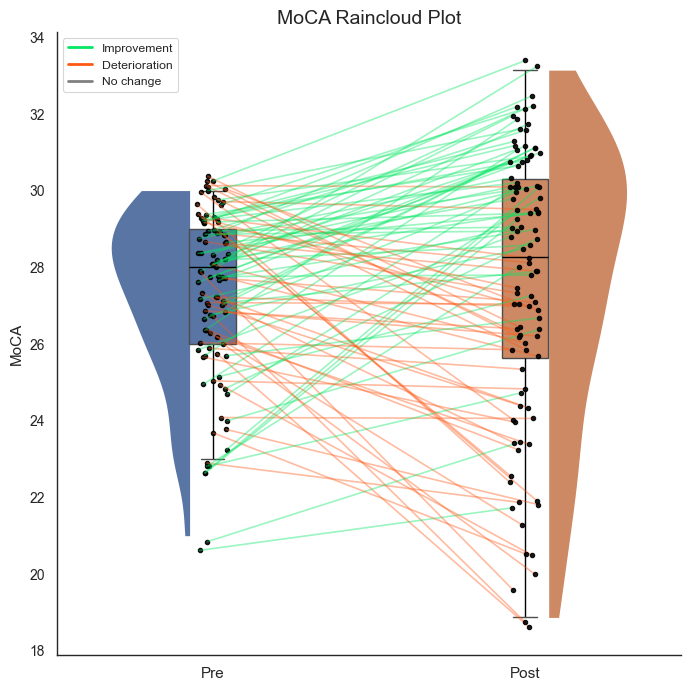

1.8772806781020333
0.9271441734100049


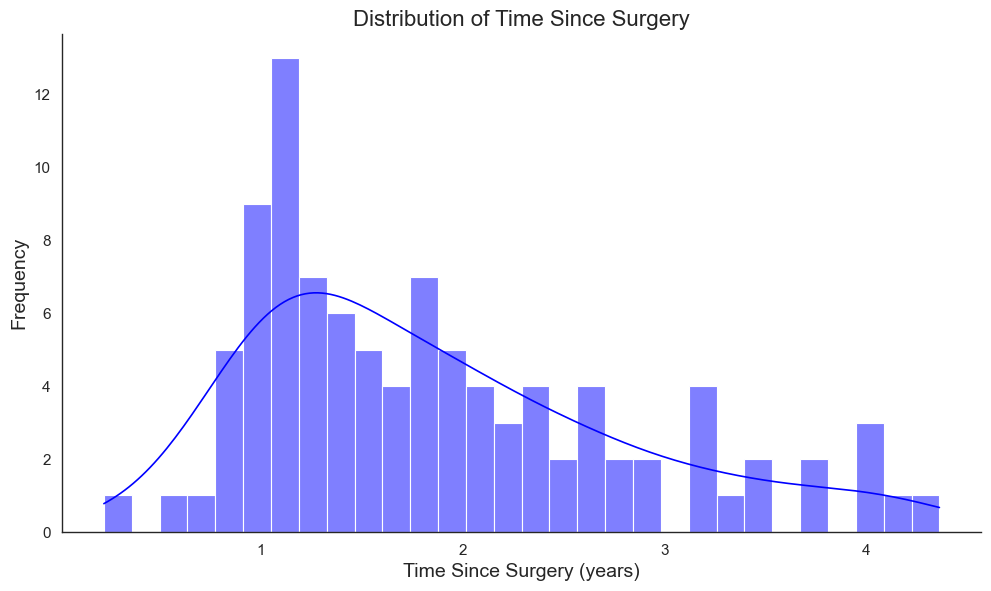

10.83765789309937
4.715716789700349


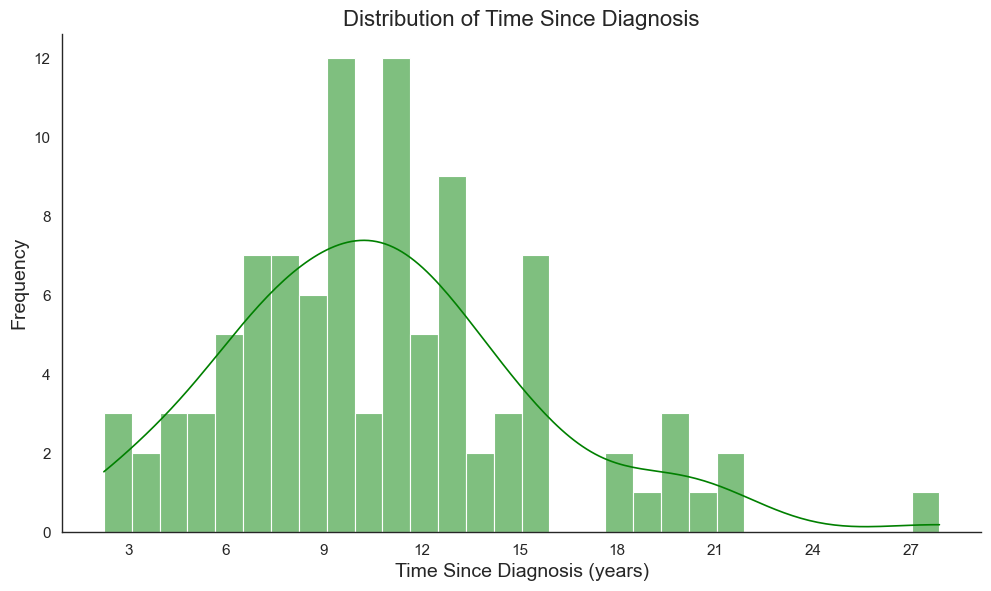

In [19]:
quest = root_dir + "/figures/plotting_memory/moca_wo_mmse_detrend.csv"
save_path = root_dir + "/figures/MoCA_orig/"
os.makedirs(save_path, exist_ok=True)
demographics_pre_post(quest, model_data_path=None, modality_name=identifier, save_path=save_path, show=True)
histoplot(quest, "TimeSinceSurgery", save_path, show=True)
histoplot(quest, "TimeSinceDiag", save_path, show=True)